# Speech Emotion Recognition 

In this Python project, we are going to learn how to recognize emotions from speech. 

For that, We will use an MLPClassifier: This is a Multi-layer Perceptron Classifier; it optimizes the log-loss function using LBFGS or stochastic gradient descent.The MLPClassifier has an internal neural network for the purpose of classification. This is a feedforward ANN model.

We also use Librosa with is the Python library for analyzing audio and music

And Sklearn libraries 

And the RAVDESS dataset : Ryerson Audio-Visual Database of Emotional Speech and Song dataset https://drive.google.com/file/d/1wWsrN2Ep7x6lWqOXfr4rpKGYrJhWc8z7/view 

## 1- Importing libraries and packages 

In [6]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#import maya.cmds as cmds
#import maya.mel as mel

## 2- Extraction of sound features

In [7]:
#Extract features (mfcc, chroma, mel) from a sound file

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

## 3- Dictionary to hold numbers and the emotions available in the RAVDESS dataset, 

## - And a list to hold those we want- calm, happy, fearful, disgust.

In [8]:
#Emotions in the RAVDESS dataset

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}


In [9]:
#Emotions to observe

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## 4- loading the data and extract the features

In [10]:
#Load the data and extract features for each sound file

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/home/ther/LAB/cv/Speech_Emotion_Recognition/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

## 5- Split the dataset into training and testing sets! Let’s keep the test set 20%

In [11]:
#Split the dataset

x_train,x_test,y_train,y_test=load_data(test_size=0.2)

In [12]:
#Get the shape of the training and testing datasets

print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [13]:
#Get the number of features extracted

print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## 6- Initialization of our MLPClassifier.

In [14]:
#Initialize the Multi Layer Perceptron Classifier

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


## 7- Fit and train the model

In [15]:
#Train the model

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

## 8- Prediction of the test set (the predicted emotions for the features in the test set)

In [16]:
#  Predict for the test set

y_pred=model.predict(x_test)

## 9- Accuracy of our model

In [17]:
#The accuracy of our model

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)


# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.32%


In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

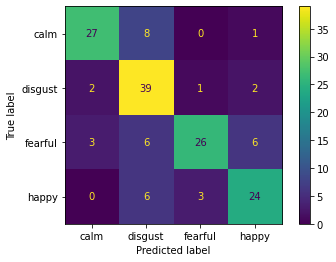

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

clf = SVC(random_state=0)
clf.fit(x_train, y_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [26]:
print(cm)

[[27  8  0  1]
 [ 2 39  1  2]
 [ 3  6 26  6]
 [ 0  6  3 24]]
